In [75]:
%pylab inline
import pandas as pd
import numpy as np
from scipy import  stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [76]:
#PC 
data = pd.read_excel('C:/Users/Jeffery/Google Drive/Homework/IOWA/final data.xlsx')
#Mac data = pd.read_excel('/Users/Jeffery/Google Drive/Homework/IOWA/final data.xlsx')
data.head(5)

,BILL_RUN_DATE,yr,month_nm,Division,sales,dayofweek,week
0,2014-01-03,2014,Jan,C,2527858.254,4,1
1,2014-01-03,2014,Jan,S,84509.652,4,1
2,2014-01-03,2014,Jan,G,1027.920,4,1
3,2014-01-03,2014,Jan,F,2113.662,4,1
4,2014-01-03,2014,Jan,K,341143.206,4,1


In [77]:
devisiona = data.loc[data['Division'] == 'A']
devisiona = devisiona.loc[devisiona['sales'] > 0]
backup = devisiona.loc[devisiona['yr'].isin([2015,2016])]
devisiona = devisiona.loc[devisiona['yr'].isin([2014,2015])]
devisiona.head(5)

,BILL_RUN_DATE,yr,month_nm,Division,sales,dayofweek,week
7,2014-01-03,2014,Jan,A,2074.950,4,1
46,2014-01-07,2014,Jan,A,460.920,1,2
88,2014-01-09,2014,Jan,A,2431.338,3,2
109,2014-01-10,2014,Jan,A,4407.444,4,2
161,2014-01-14,2014,Jan,A,1193.664,1,3


In [78]:
devisiona = devisiona.groupby(['yr','week'],as_index = False).sum()
del devisiona['dayofweek']
devisiona

,yr,week,sales
0,2014,1,5724.294000
1,2014,2,7299.702000
2,2014,3,16901.508000
3,2014,4,12630.170542
4,2014,5,31720.890000
5,2014,6,2139.642000
6,2014,7,20599.044000
7,2014,8,19249.734326
8,2014,9,10440.240000
9,2014,10,11388.512657


In [79]:
sales = pd.to_numeric(devisiona['sales'].as_matrix())
len(sales)

104

In [80]:
dta = list(sales)
type(dta)

list

In [81]:
dta=pd.Series(dta)
dta.head(5)

0     5724.294000
1     7299.702000
2    16901.508000
3    12630.170542
4    31720.890000
dtype: float64

In [82]:

dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2104'))
dta.head(5)

2001-12-31     5724.294000
2002-12-31     7299.702000
2003-12-31    16901.508000
2004-12-31    12630.170542
2005-12-31    31720.890000
dtype: float64

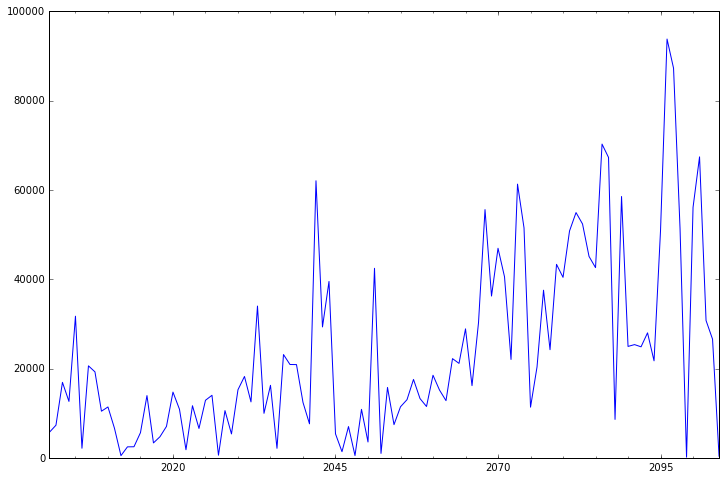

In [83]:
dta.plot(figsize=(12,8))

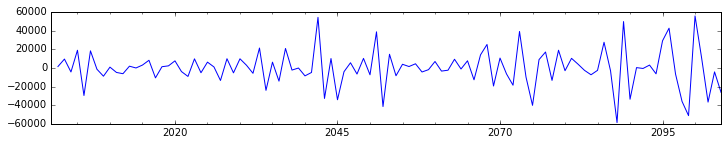

In [84]:
fig = plt.figure(figsize=(12,2))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

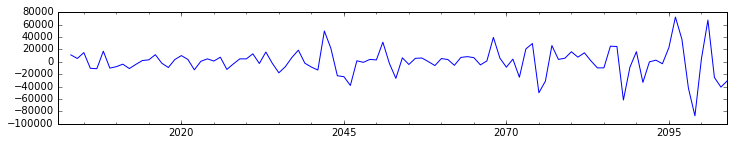

In [85]:
fig = plt.figure(figsize=(12,2))
ax1= fig.add_subplot(111)
diff1 = dta.diff(2)
diff1.plot(ax=ax1)

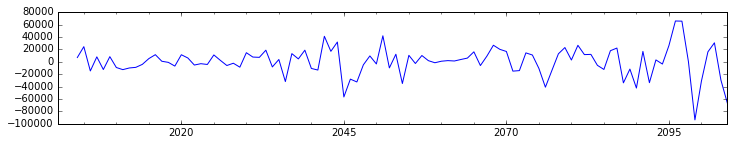

In [86]:
fig = plt.figure(figsize=(12,2))
ax1= fig.add_subplot(111)
diff1 = dta.diff(3)
diff1.plot(ax=ax1)

Axes(0.125,0.125;0.775x0.775)


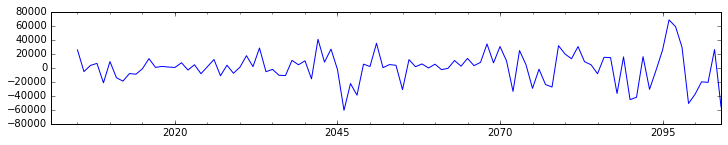

In [87]:
fig = plt.figure(figsize=(12,2))
ax1= fig.add_subplot(111)
diff1 = dta.diff(4)
print(diff1.plot(ax=ax1))


Axes(0.125,0.125;0.775x0.775)


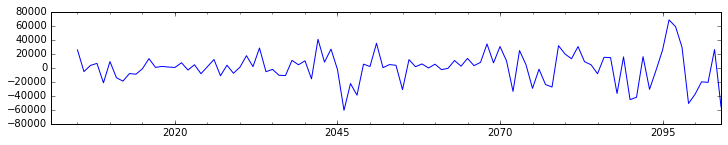

In [88]:
fig = plt.figure(figsize=(12,2))
ax1= fig.add_subplot(111)
diff1 = dta.diff(4)
print(diff1.plot(ax=ax1))

Axes(0.125,0.125;0.775x0.775)


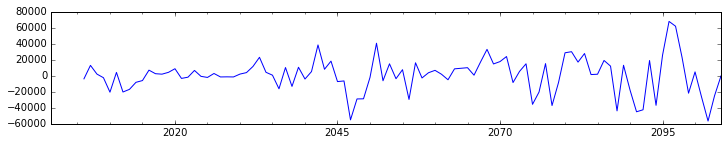

In [89]:
fig = plt.figure(figsize=(12,2))
ax1= fig.add_subplot(111)
diff1 = dta.diff(5)
print(diff1.plot(ax=ax1))

Axes(0.125,0.125;0.775x0.775)


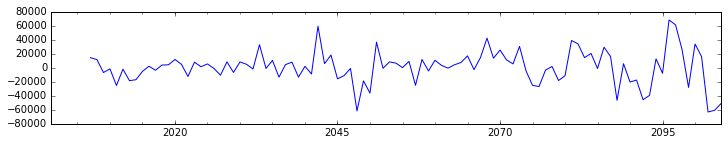

In [90]:
fig = plt.figure(figsize=(12,2))
ax1= fig.add_subplot(111)
diff1 = dta.diff(6)
print(diff1.plot(ax=ax1))

Axes(0.125,0.125;0.775x0.775)


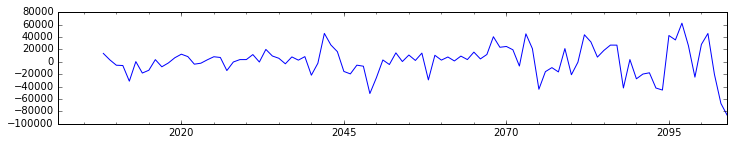

In [91]:
fig = plt.figure(figsize=(12,2))
ax1= fig.add_subplot(111)
diff1 = dta.diff(7)
print(diff1.plot(ax=ax1))

Axes(0.125,0.125;0.775x0.775)


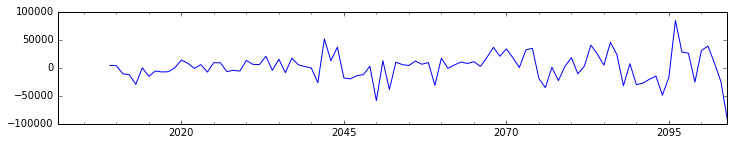

In [92]:
fig = plt.figure(figsize=(12,2))
ax1= fig.add_subplot(111)
diff1 = dta.diff(8)
print(diff1.plot(ax=ax1))

Axes(0.125,0.125;0.775x0.775)


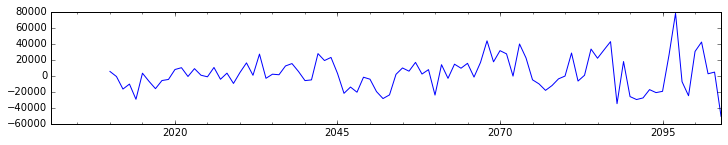

In [93]:
fig = plt.figure(figsize=(12,2))
ax1= fig.add_subplot(111)
diff1 = dta.diff(9)
print(diff1.plot(ax=ax1))

Axes(0.125,0.125;0.775x0.775)


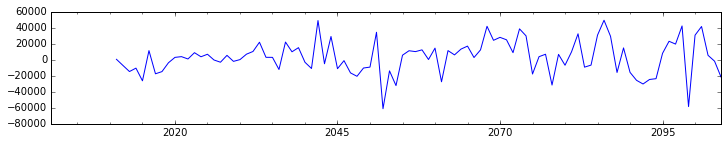

In [94]:
fig = plt.figure(figsize=(12,2))
ax1= fig.add_subplot(111)
diff1 = dta.diff(10)
print(diff1.plot(ax=ax1))

Axes(0.125,0.125;0.775x0.775)


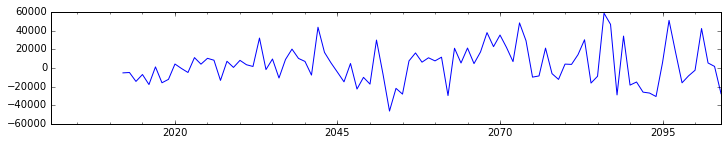

In [95]:
fig = plt.figure(figsize=(12,2))
ax1= fig.add_subplot(111)
diff1 = dta.diff(11)
print(diff1.plot(ax=ax1))

Axes(0.125,0.125;0.775x0.775)


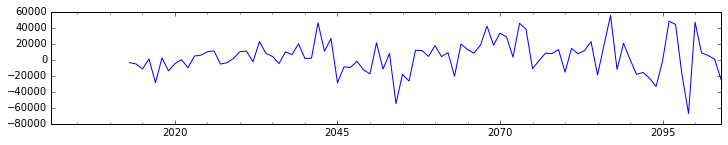

In [96]:
fig = plt.figure(figsize=(12,2))
ax1= fig.add_subplot(111)
diff1 = dta.diff(12)
print(diff1.plot(ax=ax1))

In [97]:
dta= dta.diff(2)
dta = dta.dropna()
dta.head(2)

2003-12-31    11177.214000
2004-12-31     5330.468542
dtype: float64

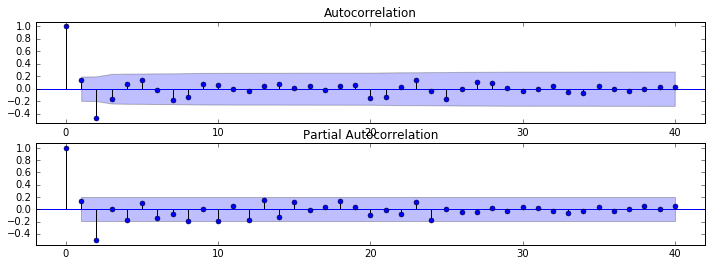

In [98]:

#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉
fig = plt.figure(figsize=(12,4))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

In [99]:
arma_mod20 = sm.tsa.ARMA(dta,(1,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)
arma_mod30 = sm.tsa.ARMA(dta,(2,0)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod40 = sm.tsa.ARMA(dta,(1,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)
arma_mod50 = sm.tsa.ARMA(dta,(2,1)).fit()
print(arma_mod50.aic,arma_mod50.bic,arma_mod50.hqic)

2335.3281702414524 2343.20308868 2338.5169932
2306.624922375543 2317.12481363 2310.87668632
2303.961687454087 2314.46157871 2308.2134514
2308.4129893716463 2321.53785344 2313.7276943


D:\anaconda\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


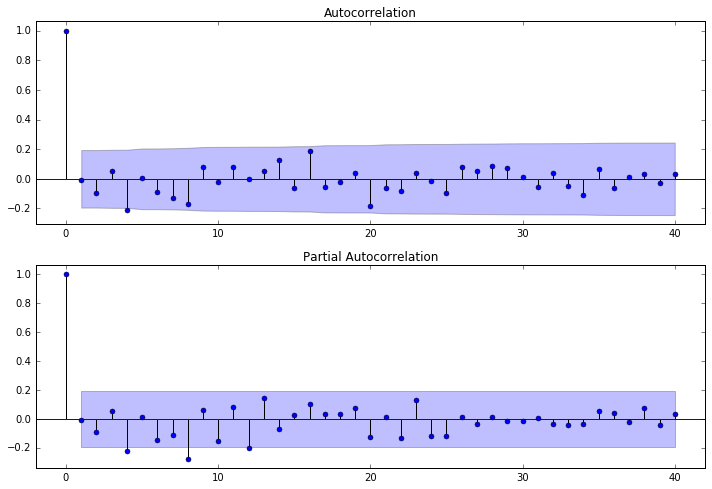

In [100]:
resid = arma_mod30.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [101]:
print(sm.stats.durbin_watson(arma_mod30.resid.values))

1.98303824763


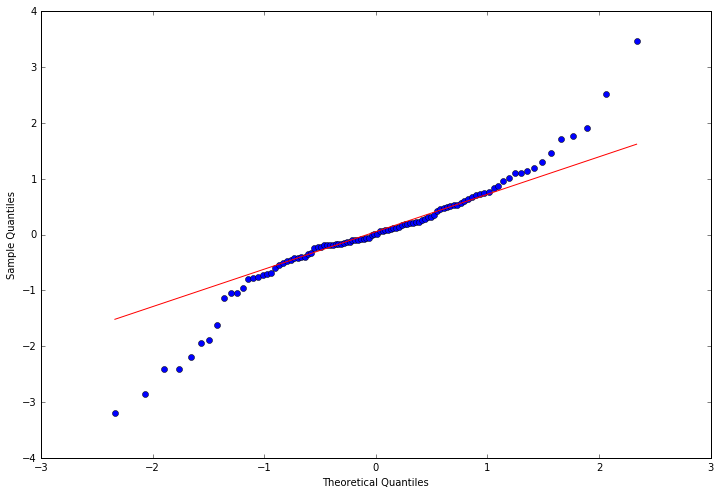

In [102]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [103]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.010771   0.012186  0.912101
2.0  -0.095151   0.972604  0.614896
3.0   0.053150   1.275297  0.735007
4.0  -0.213021   6.187217  0.185596
5.0   0.003619   6.188650  0.288293
6.0  -0.090017   7.084042  0.313145
7.0  -0.127095   8.887749  0.260816
8.0  -0.170718  12.176768  0.143489
9.0   0.079889  12.904761  0.166963
10.0 -0.019775  12.949852  0.226489
11.0  0.082891  13.750798  0.247091
12.0 -0.000105  13.750799  0.316904
13.0  0.053746  14.095094  0.367181
14.0  0.124878  15.974951  0.314906
15.0 -0.059883  16.412191  0.355199
16.0  0.187569  20.751858  0.188247
17.0 -0.055215  21.132338  0.220427
18.0 -0.023141  21.199966  0.269445
19.0  0.042096  21.426455  0.313722
20.0 -0.182630  25.741277  0.174528
21.0 -0.064984  26.294323  0.195448
22.0 -0.085207  27.257036  0.201626
23.0  0.041473  27.487994  0.235764
24.0 -0.017472  27.529511  0.280383
25.0 -0.098663  28.870582  0.269362
26.0  0.080499  29.775059  0

In [104]:
dta['2104-12-31':]

2104-12-31   -30398.394925
dtype: float64

In [105]:
verify = backup.loc[backup['Division'] == 'A']
verify = verify.loc[verify['yr'].isin([2016])]
verify = verify.groupby(['yr','week'],as_index = False).sum()
sales = pd.to_numeric(verify['sales'].as_matrix())
sales = list(sales)
sales=pd.Series(sales)
sales.head(5)

0     54040.536000
1    106144.698663
2     76477.530000
3     34272.834000
4     27666.624000
dtype: float64

In [106]:
dta = list(sales)
dta=pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2104','2155'))
dta.head(5)

2104-12-31     54040.536000
2105-12-31    106144.698663
2106-12-31     76477.530000
2107-12-31     34272.834000
2108-12-31     27666.624000
dtype: float64

In [107]:
dta.diff(8)

2104-12-31              NaN
2105-12-31              NaN
2106-12-31              NaN
2107-12-31              NaN
2108-12-31              NaN
2109-12-31              NaN
2110-12-31              NaN
2111-12-31              NaN
2112-12-31    -25893.324000
2113-12-31    -11890.056663
2114-12-31    -31812.930000
2115-12-31     55009.236000
2116-12-31    133529.412000
2117-12-31     34921.284114
2118-12-31    -16197.001780
2119-12-31     14125.543906
2120-12-31    -23978.742336
2121-12-31    -80762.985346
2122-12-31    -34802.022000
2123-12-31    -40935.960000
2124-12-31    -77884.198789
2125-12-31    -31901.646000
2126-12-31     -2296.492220
2127-12-31     -6589.964953
2128-12-31     44411.742336
2129-12-31     13036.585553
2130-12-31     43595.568000
2131-12-31     -3156.732000
2132-12-31    -32288.131211
2133-12-31     48163.548000
2134-12-31     24155.623352
2135-12-31      -891.052613
2136-12-31     42655.512000
2137-12-31     19217.029793
2138-12-31     -9734.262931
2139-12-31    -34863

Axes(0.125,0.125;0.775x0.775)


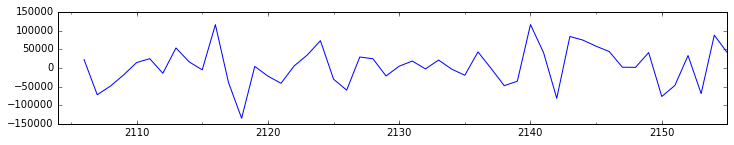

In [108]:
fig = plt.figure(figsize=(12,2))
ax1= fig.add_subplot(111)
diff1 = dta.diff(2)
print(diff1.plot(ax=ax1))

2104-12-31     5373.977575
2105-12-31    22617.059020
2106-12-31     2176.507655
2107-12-31   -10822.019989
2108-12-31    -2854.866607
2109-12-31     5456.422008
2110-12-31     2999.653899
2111-12-31    -1787.406816
2112-12-31    -1474.420264
Freq: A-DEC, dtype: float64


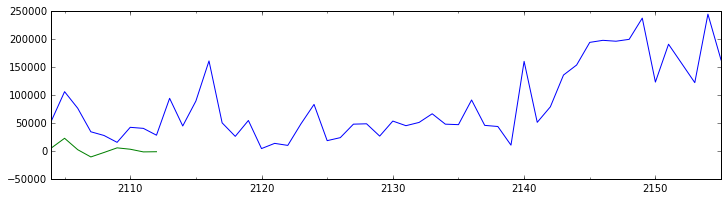

In [109]:
predict_sunspots = arma_mod30.predict('2104', '2112', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 3))
ax = dta.ix['2001':].plot(ax=ax)
predict_sunspots.plot(ax=ax)